# Кластеризация

## Основные понятия

**Кластерный анализ (Data clustering)** — это задача машинного обучения БЕЗ УЧИТЕЛЯ, которая заключается в разбиении (группировки) заданной выборки данных (объектов) так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров значительно отличались друг от друга.

**Какие данные есть и чего хотим добиться.**

Входные данные:<br>

N - мерная матрица признаков и их значений.

Задача:<br>
Объеденить объекты на K кластеров так, что бы:<br>
1. Объекты в одном кластере были максимально похожи друг на друга, а<br>
2. Объекты в разных кластерах существенно бы отличались друг от друга.

Выходные данные:<br>

K кластеров данных, объедененных по каким-то признакам.

С помощью методов кластеризации мы можем автоматически
найти группу похожих объектов, возможно, выделить аномалии, какие-то изолированные объекты, которые требуют дополнительного изучения или выбрасывания из данных, и кластеризация
позволяет провести более детальный анализ самих кластеров. Иногда бывает полезно построить
отдельные модели на каждом кластере вместо того, чтобы строить одну модель на всех данных и
получить какой-то мусор.

## Примеры использования кластеризации в реальной жизни

**Продажи и маркетинг**

Крупные компании стремятся к таргетированию и персонализации своих продуктов. Они делают это, анализируя особенности людей и делясь программами для их привлечения.

Это проверенный и апробированный метод, который помогает организациям нацеливаться на конкретную аудиторию. К сожалению, некоторые компании безуспешно работают в области продаж и маркетинга.

Чтобы получить максимальную отдачу от своих инвестиций, необходимо правильно ориентироваться на людей. Вы рискуете значительными потерями и недоверием клиентов, не анализируя то, чего хочет ваша аудитория. Алгоритмы кластеризации могут сгруппировать людей со схожими чертами и проанализировать, приобретут ли они Ваш продукт.

Создание групп может помочь предприятиям провести тесты, чтобы определить, что им необходимо сделать для улучшения продаж.

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import pandas as pd

df = pd.read_csv('mall_clustering_with_groups.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,1,0,19,15,39,2
1,1,2,0,21,15,81,1
2,2,3,1,20,16,6,0
3,3,4,1,23,16,77,1
4,4,5,1,31,17,40,2


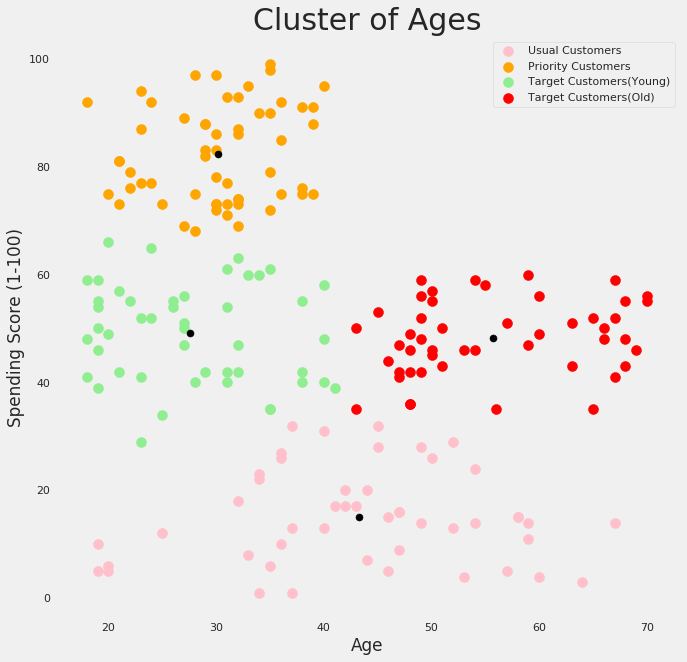

**Медицина**

Этот набор данных содержит 1339 записей о медицинском страховании. Индивидуальные медицинские расходы, выставляемые медицинским страхованием, возраст, пол, семейное положение и курит ли пациент.

- **bmi:** индекс массы тела, обеспечивающий понимание тела, вес, который относительно высокий или низкий по отношению к росту, объективный индекс веса тела (кг / м ^ 2) с использованием отношения роста к весу, в идеале от 18,5 до 24,9

- **charges**: индивидуальные медицинские расходы, выставленные на счет медицинского страхования.

https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


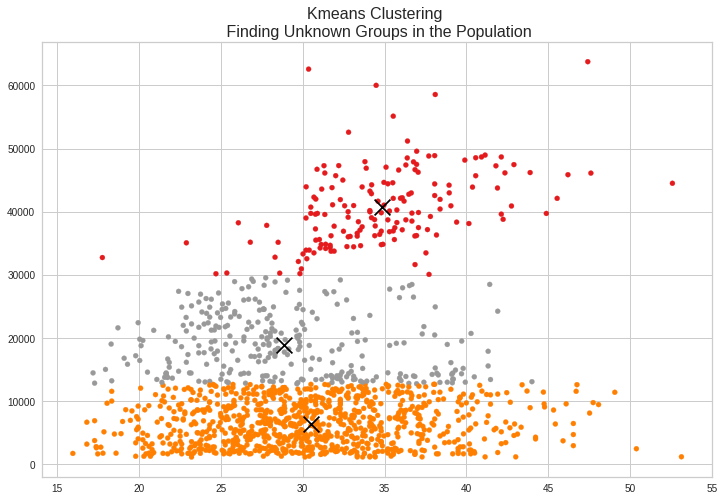

На графике представлен один из вариантов решения задачи, когда получется три кластера.

- По оси X - bmi
- По оси Y - charges

Мы видим из графика, что в оранжевом кластере, например у нас получилась группа пациентов с самыми низкими расходами и разбросом bmi по всему диапазону

## Основные методы кластеризации

Алгоритмы кластеризации никак не используют информацию об истинных метках объектов и оперируют лишь похожестью объекта. Ну а что такое похожесть, в каждом алгоритме
кластеризации определяется по-своему.

**Самые популярные методы:**
1. Метод k-средних (k-means)
2. Иерархическая кластеризация
3. DBSCAN

## Метод k-средних

### Основные моменты алгоритма

**Метод k-средних** – это метод кластерного анализа, цель которого является разделение M наблюдений/объектов (из пространства ) на k кластеров, при этом каждое наблюдение относится к тому кластеру, к центру (центроиду) которого оно ближе всего.

Центроид - это центр кластера.

**Что важно для алгоритма и что является его недостатком и преимуществом?**

1. Необходимо заранее знать количество кластеров - это существенный минус алгоритма. Тут встает вопрос как узнать количество кластеров (помним что у нас обучение без учителя, значит правильных ответов нет).
2. Метод очень простой и быстрый - это является его преимуществом перед другими методами.
3. Для постоения алгоритма необходимо знать начальные центры кластеров - опять же встает как выбрать начальные центроиды?

**Как происходит разбиение данных на кластеры?**

Возникает он из следующей оптимизационной задачи: у нас есть некоторое множество объектов, мы хотим найти в них k кластеров, каждый из которых характеризуется центроидом Сk. Объект относится к соответствующему кластеру, если его центроид находится ближе других центроидов к этому объекту.

Алгоритм состоит из следующих шагов:
1. Инициализация центроидов (например, рандомно)
2. Обновление состава кластеров, то есть приписывание объекта к тому кластеру, центроид которого расположен ближе к этому объекту.
3. Обновление положения самих центроидов, то есть пересчитывание положения центроидов, как центра масс объектов, которые лежат в соответствующем кластере.
4. Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила останова, например, будет достигнуто какое-то максимальное количество итераций или пока кластеры не перестанут меняться.


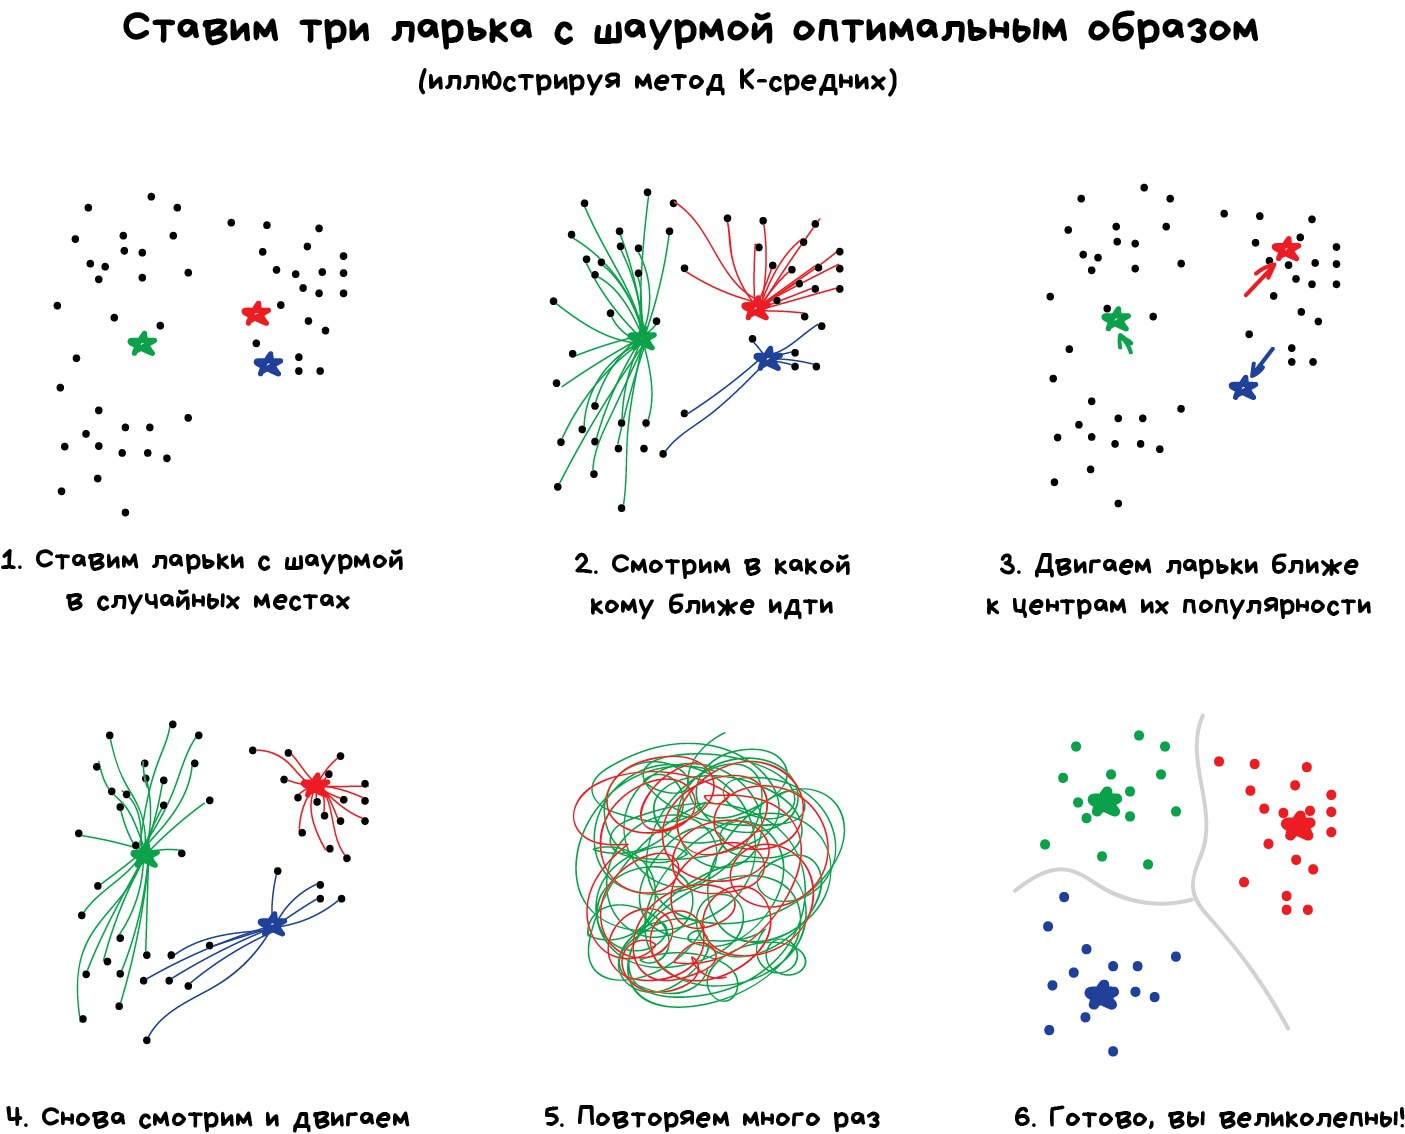

**Отметим еще важный момент, как вычисляется расстояние между точками (между объектом и центроидом)?**

Кластеризация объектов происходит таким образом, чтобы минимизировать следующий критерий - сумму квадратов расстояния между объектом и ближайшим к нему центроидом по всем кластерам, то есть значение.

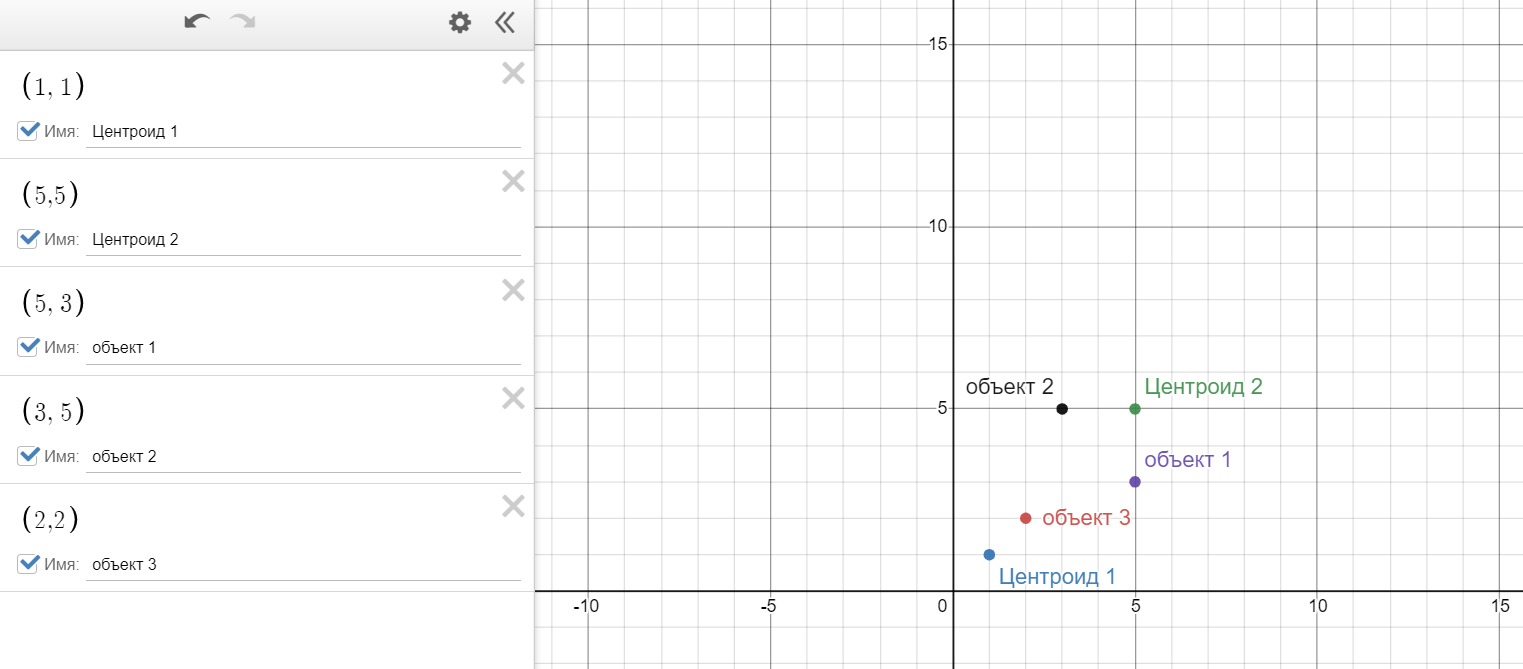

**Задача 1.**
Есть два центроида - 1 и 2, т.е. два кластера потенциальных.

К какому центроиду будут отнесены объекты? Вычислите расстояния от объектов до каждого центроида.

Искать центроиды удобно и просто, но в реальных задачах кластеры могут быть совсем не круглой формы. Вот вы геолог, которому нужно найти на карте схожие по структуре горные породы — ваши кластеры не только будут вложены друг в друга, но вы ещё и не знаете сколько их вообще получится.

### Как найти оптимальное число кластеров k?

Одна из самых сложных задач в этом алгоритме кластеризации – выбрать правильные значения k. Существует два метода.

1. **Метод локтя**

**Метод локтя (Elbow Rule)** – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

Наконец, мы построим график между значениями k и суммой квадрата внутри кластера, чтобы получить значение k. Мы внимательно рассмотрим график. В какой-то момент значение по оси x резко уменьшится. Эта точка будет считаться оптимальным значением k:

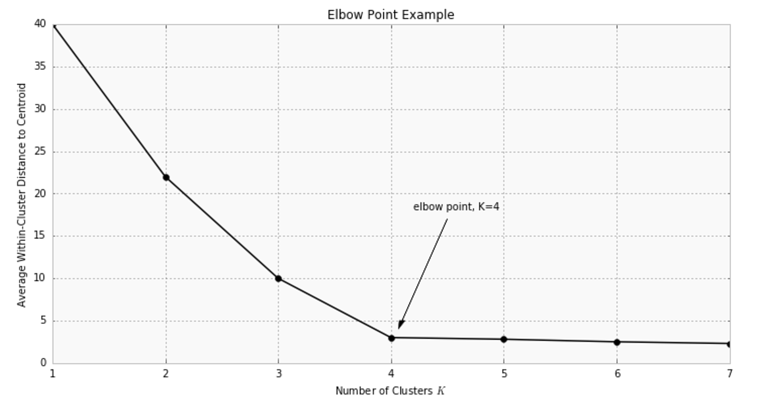

2. **Метод силуэта**

Метод силуэта (Silhouette Method) вычисляет среднее расстояние между точками в своем кластере ai и среднее расстояние от точек до следующего ближайшего кластера, называемого bi.

Теперь мы можем вычислить коэффициент силуэта всех точек в кластерах и построить график. Последний также поможет в обнаружении Выбросов (Outlier). Значение метрики силуэта находится в диапазоне от -1 до 1. Обратите внимание, что коэффициент силуэта, равный –1 – это наихудший сценарий. Для картинки выше система вычислила расстояния между всеми точками при различных допущениях о числе кластеров и построила соответствующие горизонтальные гистограммы. Мы выбираем k, равный 3, потому что зеленая гистограмма меньше, хотя стоит, возможно, проверить и бо́льшие значения.

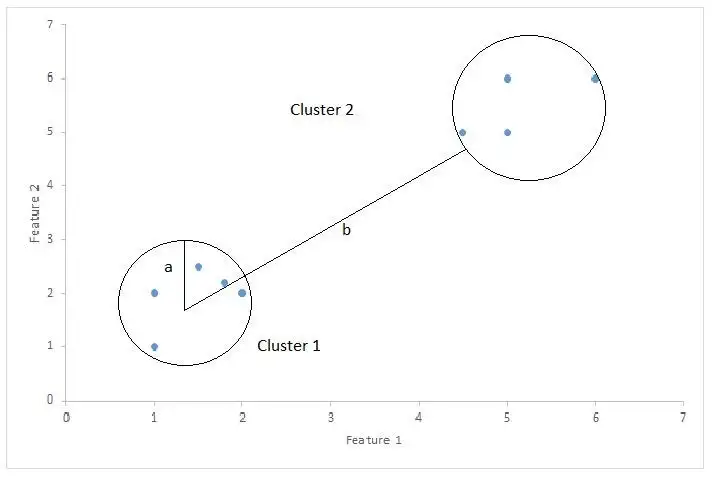

$Silhouette Score = \frac{b-a}{max(a,b)}$

а = среднее расстояние внутри кластера, т. е. среднее расстояние между каждой точкой в ​​кластере.

b= среднее расстояние между кластерами, т.е. среднее расстояние между всеми кластерами.

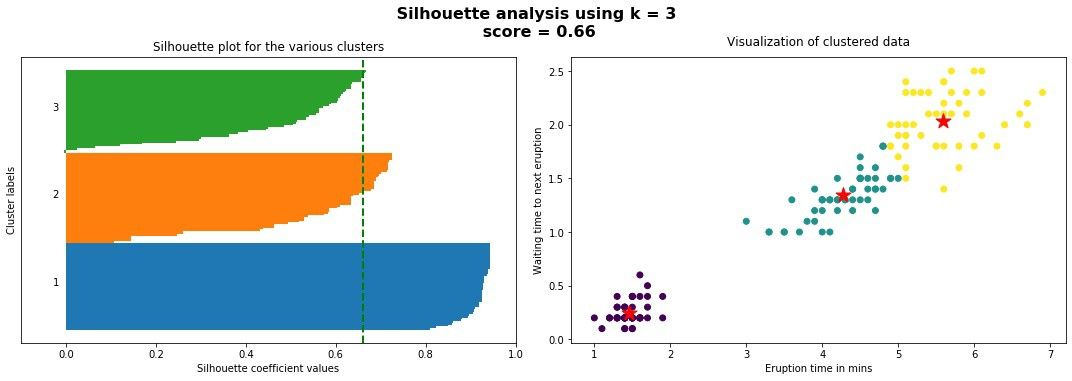

### Интерактивная картинка работы алгоритма k-means

interactive(children=(IntSlider(value=0, description='frame', max=50), IntSlider(value=4, description='n_clust…

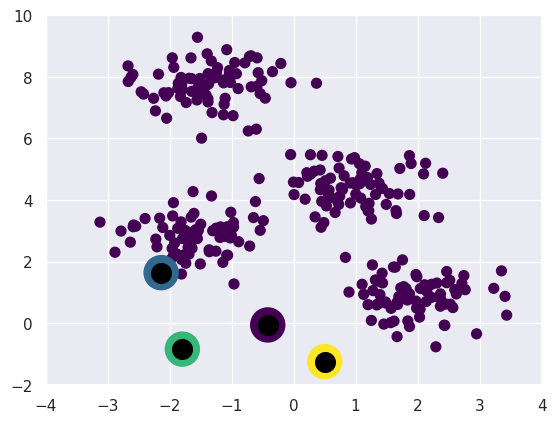

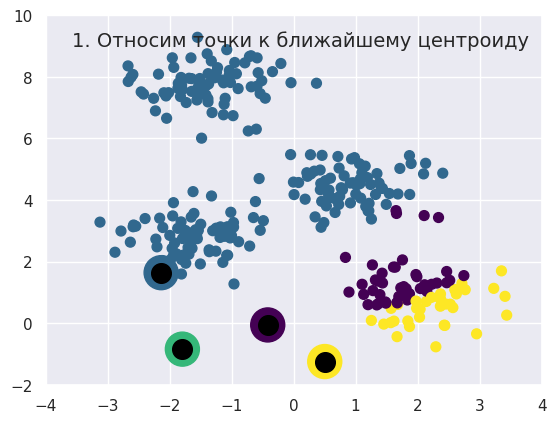

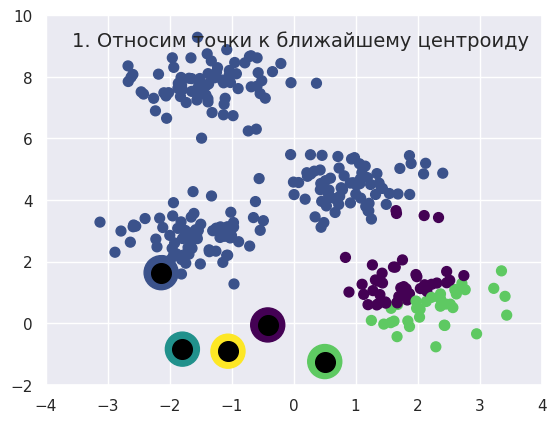

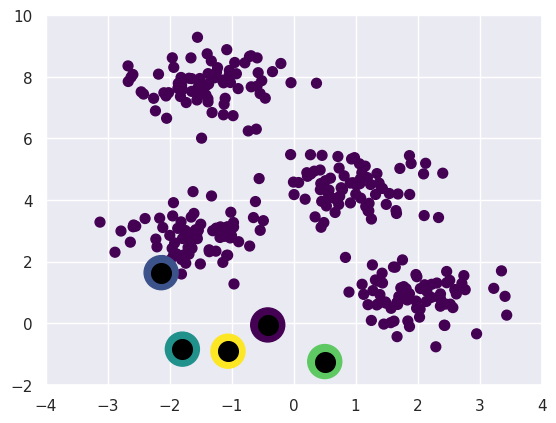

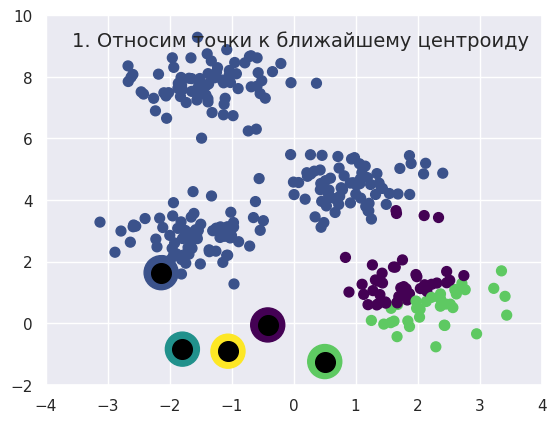

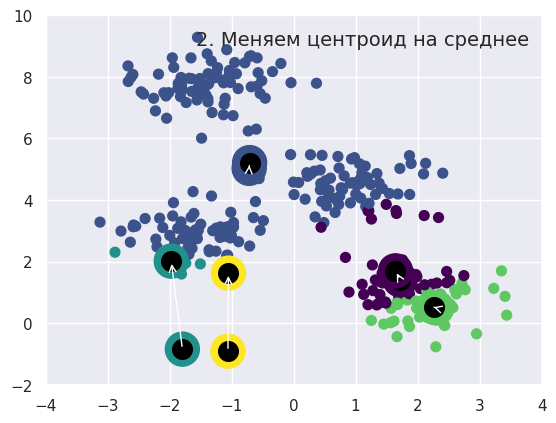

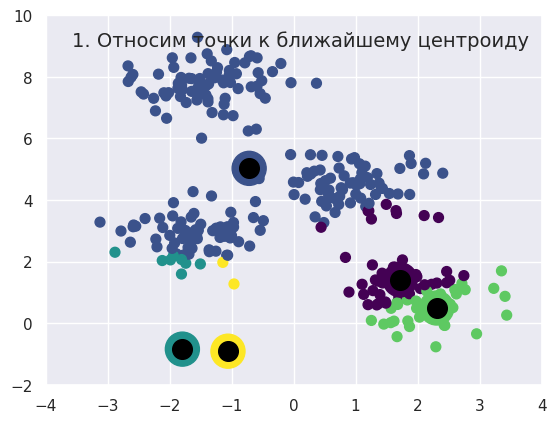

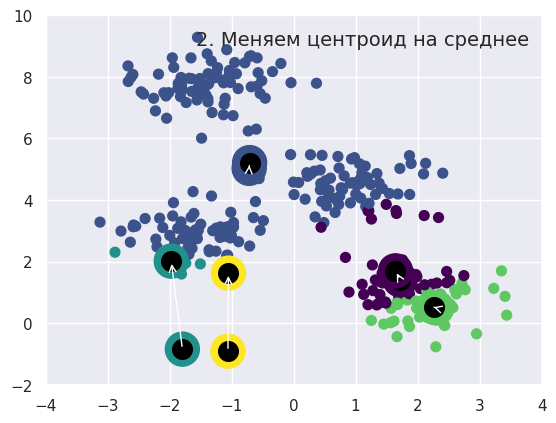

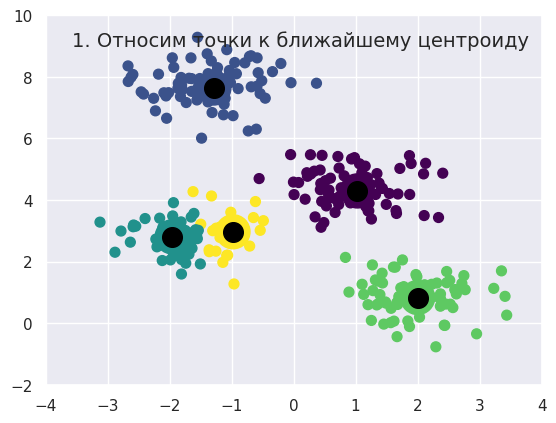

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interactive
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)

    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);

    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=600, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=200)


    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i],
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Относим точки к ближайшему центроиду",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Меняем центроид на среднее",
                     ha='right', va='top', size=14)

    return interactive(_kmeans_step, frame=(0, 50),
                    n_clusters=(min_clusters, max_clusters))

interactive_plot = plot_kmeans_interactive()
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

### Практическое задание

Возьмем для примера самый извесный набор данных для кластеризации.

Этот набор данных состоит из трех различных типов ирисов (Setosa, Versicolour и Virginica), у которых есть разные характеристики: Длина лепестка,Ширина лепестка,Длина лепестка и Ширина лепестка.

https://www.kaggle.com/uciml/iris

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Выделим вектор признаков Х
# Выделим вектор ответов Y
# Несмотря на то, что это обучение с учителем, здесь есть ответы по двум причинам:
# 1. Этот набор данных также можно использовать для классификации
# 2. Это демонстрационный набор данных, который носит учебных и демонстрационный характер, нежели практический

X = iris.loc[:,['sepal_length','petal_length']]
Y = iris['species']

In [ ]:
# реализуем кластеризацию, пока без поиска оптимального числа кластеров
from sklearn.cluster import KMeans

n=3
# Создаем модель кластеризации
kmeans = KMeans(n_clusters=3)

# обучим нашу модель
kmeans.fit(X)

# выведем полученные метки кластеров, которые вычислил алгоритм
# Setosa - 0, Versicolour – 1 и Virginica – 2
Y_pred = kmeans.labels_
Y_pred

NameError: name 'X' is not defined

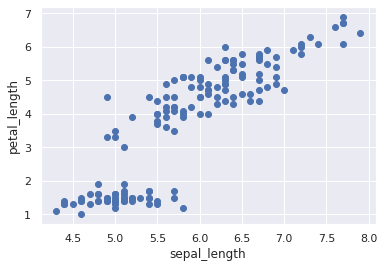

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(iris['sepal_length'],iris['petal_length'])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

In [ ]:
X['cluster'] = Y_pred
X

,SepalLengthCm,PetalLengthCm,cluster
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,1
147,6.5,5.2,2
148,6.2,5.4,2


In [ ]:
X[X['cluster']==0]

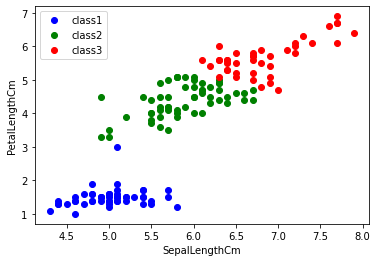

In [ ]:
import matplotlib.pyplot as plt

# X[строки, столбцы]
# plt.plot(x,y)
plt.plot(X[X['cluster']==0]['sepal_length'], X[X['cluster']==0]['petal_length'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['sepal_length'], X[X['cluster']==1]['petal_length'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['sepal_length'], X[X['cluster']==2]['petal_length'], 'ro', label='class3')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc=0)
plt.show()

Теперь попробуем не наугад выбрать число кластеров, а эмпирическим путем.

In [ ]:
list(range(1,9))

[1, 2, 3, 4, 5, 6, 7, 8]

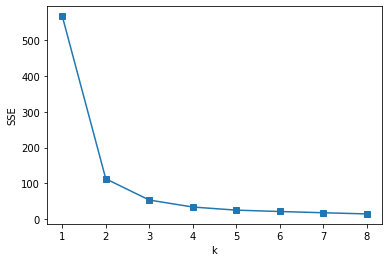

In [ ]:
# метод локтя
X = iris.loc[:,['sepal_length','petal_length']]

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
kmeans.predict(X)

## Иерархическая кластеризация

Иерархическая кластеризация, как следует из названия, представляет собой алгоритм, который строит иерархию кластеров.

Иерархическая кластеризация (англ. hierarchical clustering) — множество алгоритмов кластеризации, направленных на создание иерархии вложенных разбиений исходного множества объектов.

Для визуального представления результатов кластеризации используется дендрограмма — дерево, построенное по матрице мер близости между кластерами. В узлах дерева находятся подмножества объектов из обучающей выборки. При этом на каждом ярусе дерева множество объектов из всех узлов составляет исходное множество объектов. Объединение узлов между ярусами соответствует слиянию двух кластеров. При этом длина ребра соответствует расстоянию между кластерами.

**Иерархическая кластеризация разделена на два типа :**

- Агломеративная иерархическая кластеризация

В Агломеративная иерархическая кластеризация, Каждая точка данных рассматривается как один кластер, что формирует общее количество кластеров, равных количеству точек данных. И тогда мы продолжаем группировать данные на основе метрик сходства, делая кластеры, поскольку мы перемещаемся в иерархию. Этот подход также называется подходом снизу вверх.

- Дивизионный метод иерархической кластеризации

Диспектива иерархическая кластеризация противоположна тому, что агломеративный ХК. Здесь мы начинаем с одного кластера, состоящего из всех точек данных. С каждой итерацией мы отделяем точки, которые далеки от других на основе метрик расстояния до тех пор, пока каждый кластер имеет ровно 1 точку данных.

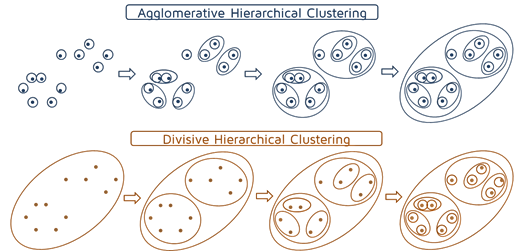

Результат иерархической кластеризации может быть представлен с помощью дендрограммы.

**Дендрограмма** — древовидная диаграмма, содержащая n количество уровней, представляющих собой каждый шаг процесса последовательного укрупнения кластеров.

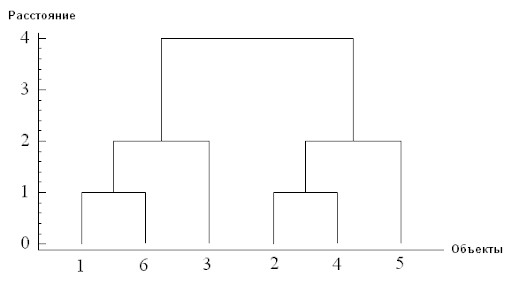

- По оси Х откладываются объекты
- по оси У расстояние между объектами

На оси X у дендрограммы расположены названия объектов, а на оси Y — расстояние, на котором соответствующие объекты, кластеры, объединяются друг с другом.

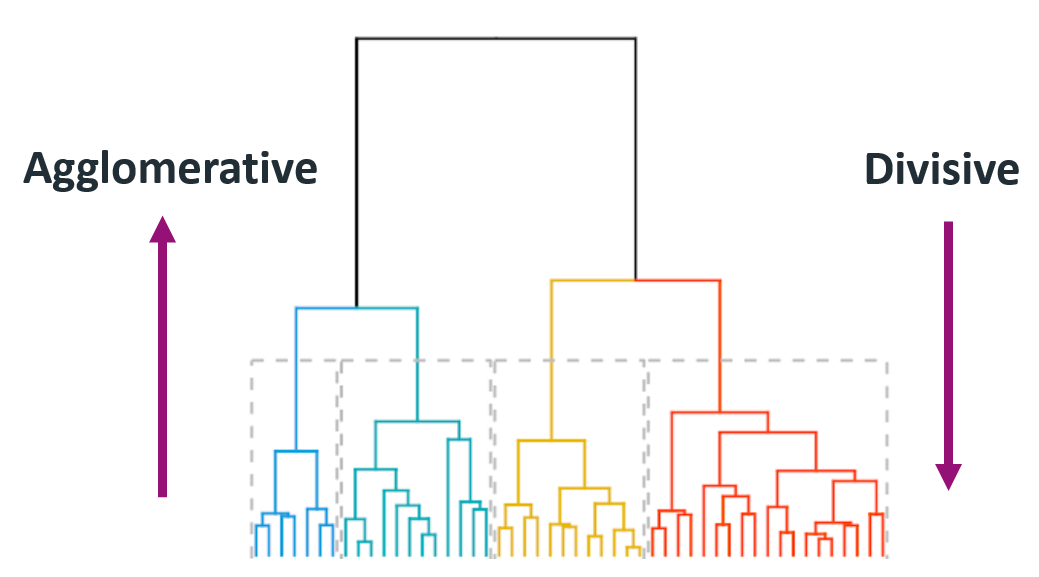

Scikit-learn (sklearn) реализует только агломерационную кластеризацию.

Scipy - иерархическая кластеризаций.

По сравнению с K-средних агломерационные алгоритмы более громоздки и плохо масштабируются для больших наборов данных.
- Агломерационные алгоритмы больше подходят для статистических исследований.
- Эти алгоритмы предлагают преимущество создания полного спектра вложенных кластерных решений.

https://www.kaggle.com/uciml/iris

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
X = iris.iloc[:, :2]
X

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


**Ниже приведены шаги, связанные с агломеративной кластеризацией:**

1. Вначале рассматривайте каждую точку данных как один кластер. Таким образом, число кластеров в начале будет равно K, а K-целое число, представляющее количество точек данных.
2. Сформируйте кластер, соединив две ближайшие точки данных, в результате чего получатся кластеры K-1.
3. Сформируйте больше кластеров, соединив два ближайших кластера, что приведет к кластерам K-2.
4. Повторяйте описанные выше три шага, пока не образуется один большой кластер.
5. Как только один кластер сформирован, дендрограммы используются для разделения на несколько кластеров в зависимости от проблемы. Мы подробно рассмотрим концепцию дендрограммы в следующем разделе.

Существуют различные способы определения расстояния между кластерами. Само расстояние может быть евклидовым или манхэттенским.

`scipy.cluster.hierarchy.linkage(X, method='single', metric='euclidean', optimal_ordering=False)`

- **method:** методы расчета расстояния между вновь сформированным кластером и каждым из них
- **metric:**: метрика расстояния (евклидово расстояние, например)

Есть несколько способов пересчета расстояния между кластерами после их объединения. По-английски эти способы называются Linkage:
1. Первый способ — **Single Linkage**, и в нем расстояние между кластерами вычисляется как минимальное между всеми парами объектов из разных кластеров.
2. Второй способ — **Complete Linkage**. В нем расстояние между кластерами считается как максимальное расстояние между парами объектов из разных кластеров.
3. **Average Linkage** — это просто среднее расстояние между всеми парами объектов из разных кластеров.
4. **Centroid Linkage** — это расстояние между центроидами разных кластеров.
5. **Ward Linkage** — это немного модифицированный Centroid Linkage с учетом размеров самих кластеров.

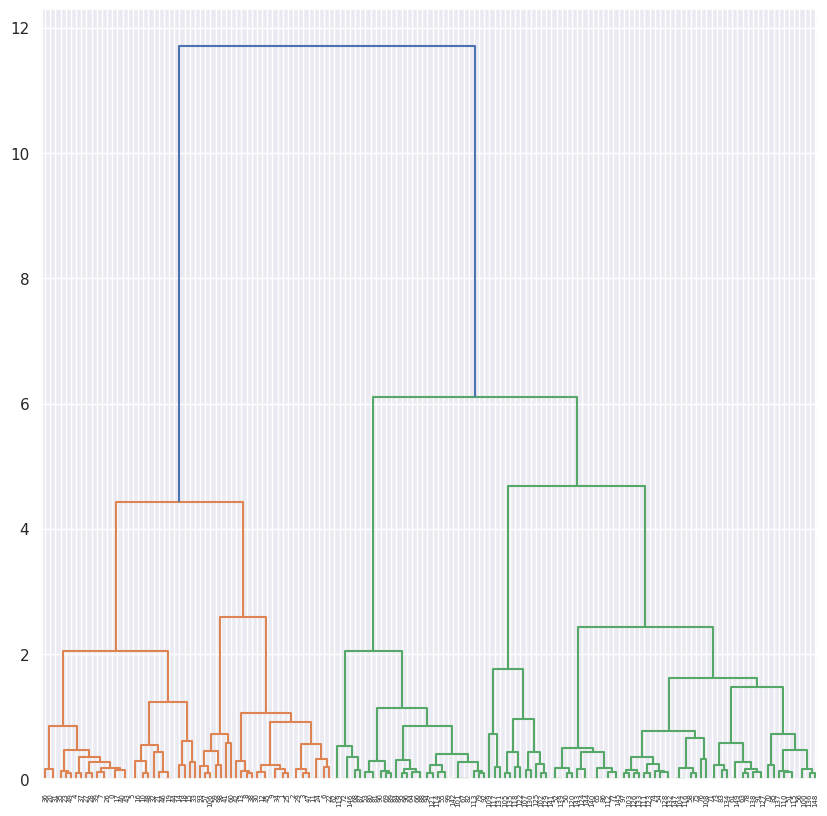

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([ 0., 17.,  0.,  2.])

In [ ]:
Z[120]

array([242.        , 262.        ,   0.30323303,  17.        ])

**В результате в переменной Z мы имеем табличку из четырех столбцов:**

- Первые два столбца содержат в себе индексы объектов, которые на этом шаге будут объединяться.
- Третий столбец содержит расстояние, на котором эти два объекта будут объединяться.
- Четвертый столбец показывает нам, какой размер кластера получится после объединения на этом шаге.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры
y_pred = fcluster(Z, 4, criterion='distance')
# label = fcluster(Z, n_clusters=5, criterion='n_clusters')

np.unique(y_pred)
# обратите внимание что в отличии kmeans или AgglomerativeClustering
# нумерация кластеров с 1

array([1, 2, 3, 4, 5], dtype=int32)

In [ ]:
iris['pred_scipy'] = y_pred
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,pred_scipy
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,2
2,4.7,3.2,1.3,0.2,Setosa,2
3,4.6,3.1,1.5,0.2,Setosa,2
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,5
146,6.3,2.5,5.0,1.9,Virginica,3
147,6.5,3.0,5.2,2.0,Virginica,5
148,6.2,3.4,5.4,2.3,Virginica,5


In [ ]:
from matplotlib import pyplot as plt

plt.scatter(iris.loc[label==1, 'sepal_length'], iris.loc[label==1, 'petal_length'], s=50, marker='o', color='red')
plt.scatter(iris.loc[label==2, 'sepal_length'], iris.loc[label==2, 'petal_length'], s=50, marker='o', color='blue')
plt.scatter(iris.loc[label==3, 'sepal_length'], iris.loc[label==3, 'petal_length'], s=50, marker='o', color='green')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Создаем модель
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', distance_threshold = 10)

y_hc = hc.fit_predict(X)
# hc.fit(X)
# hc.predict(X)

y_hc
# scipy - 1,2,3
# sklearn - 0,1,2

In [ ]:
df['pred_sklearn'] = y_hc
df

In [ ]:
plt.scatter(X.loc[y_hc==0, 'sepal_length'], X.loc[y_hc==0, 'petal_length'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'sepal_length'], X.loc[y_hc==1, 'petal_length'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'sepal_length'], X.loc[y_hc==2, 'petal_length'], s=50, marker='o', color='green')

plt.show()